In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r '/content/data'

rm: cannot remove '/content/data': No such file or directory


In [ ]:
!mkdir '/content/data'

In [ ]:
!unzip '/content/drive/MyDrive/json_data/json_data0.zip' -d '/content/data/type0'
!unzip '/content/drive/MyDrive/json_data/json_data1.zip' -d '/content/data/type1'
!unzip '/content/drive/MyDrive/json_data/json_data2.zip' -d '/content/data/type2'
!unzip '/content/drive/MyDrive/json_data/json_data3.zip' -d '/content/data/type3'
!unzip '/content/drive/MyDrive/json_data/json_data4.zip' -d '/content/data/type4'
!unzip '/content/drive/MyDrive/json_data/json_data_unknown.zip' -d '/content/data/unknown'

Archive:  /content/drive/MyDrive/json_data/json_data0.zip
   creating: /content/data/type0/content/json_data/
  inflating: /content/data/type0/content/json_data/pdf_resume_940.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_408.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_360.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_1403.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_552.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_1070.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_1430.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_803.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_621.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_774.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_884.json  
  inflating: /content/data/type0/content/json_data/pdf_resume_871.json  
  inflating

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-22 08:16:50.883023: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 08:16:51.735894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 105.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install PyPDF2
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 120.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd

In [ ]:
import PyPDF2, pdfplumber
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import json
import os

# Define the directory where your JSON files are located
json_dir = "/content/data/type0/content/json_data"

filenames = []
emails = []
mobiles = []
degrees = []
education = []
skills = []

# Define the column names for the final DataFrame
column_names = ["filename", "email","mobile", "degrees", "education", "skills", "technical skills"]

# Loop over each file in the directory
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        
        # Load the JSON file
        with open(os.path.join(json_dir, filename), "r") as f:
            data = json.load(f)
        
        # Extract the relevant data from the JSON file
        filename_id = filename.split(".")[0]
        file_data = {
            "filename": filename_id,
            "email": "",
            "mobile":"",
            "degrees": "",
            "education": "",
            "skills": ""
        }
        
        # Loop over each key in the JSON file
        for key in data:
            # Check if the key is a valid column name
            if key.lower() in column_names:
                # If so, add the corresponding value to the file data
                file_data[key.lower()] = data[key].lower()
                
                # If the key is "skills" or "technical skills", add the value to the "skills" column
                if key.lower() == "skills" or key.lower() == "technical skills":
                    file_data["skills"] = file_data["skills"] + " " + data[key].lower()
        
        # Append the file data to the lists
        filenames.append(file_data["filename"])
        emails.append(file_data["email"])
        mobiles.append(file_data["mobile"])
        degrees.append(file_data["degrees"])
        education.append(file_data["education"])
        skills.append(file_data["skills"])
        contact = list(zip(emails, mobiles))

# Create a pandas DataFrame with the extracted data
df = pd.DataFrame({
    "filename": filenames,
    "contact": contact,
    "degrees": degrees,
    "education": education,
    "skills": skills
})

# Convert all values to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
df

,filename,contact,degrees,education,skills
0,pdf_resume_1669,"(kolleparatejaswini978@gmail.com, 7075608291)","[('ssc', '2024')]",course|specialization|school/college|board/uni...,
1,pdf_resume_1127,"(nk17oct@gmail.com, 7063939081)","[('btech', '2020')]",|2.1 |secondary & higher secondary | | | |yea...,
2,pdf_resume_240,"(barchana2121@gmail.com, 7972139360)",,"national institute of technology patna|patna,i...",programming languages:|c c++ python html css|l...
3,pdf_resume_1048,"(abhinav.tanniru@research.iiit.ac.in, +9188849...","[('btech', '2014')]",2020 - present |currently pursuing 2nd year ba...,"software: familiarity with c, c++, verilog, ma..."
4,pdf_resume_1139,"(ks.20u10424@btech.nitdgp.ac.in, 9365846549)","[('btech', '2001'), ('cbse', '2020'), ('x', '2...",,
...,...,...,...,...,...
293,pdf_resume_941,"(sriyasaisri@gmail.com, +91833290784)","[('ssc', '2018')]",| |technical skills | |* c |* ...,
294,pdf_resume_292,"(20wh1a1246@bvrithyderabad.edu.in, 6303822759)","[('btech', '2003'), ('ssc', '2018')]","2020-2024 |b.tech - information technology, pr...",
295,pdf_resume_1251,"(vj.vanshikajain22@gmail.com, 8587930508)","[('btech', '2020'), ('cbse', '2020')]",,
296,pdf_resume_1890,"(vishvdave2002@gmail.com, 8866728905)","[('btech', '2020'), ('hsc', '2020')]",| | |s.no. |degree |name of the university/bo...,"|technical skills |* experience in c++, c and..."


In [ ]:
# Define the directory where the JSON files are stored
json_directory = '/content/data/type1/content/json_data'

# Initialize lists to store extracted data
file_names = []
email_addresses = []
mobile_numbers = []
degrees_list = []
education_list = []
skills_list = []
contact_list = []

# Define the column names for the final DataFrame
column_names = ["filename", "email","mobile", "degrees", "education", "skills", "technical skills"]

# Loop over each file in the directory
for file_name in os.listdir(json_directory):
    print(file_name)
    if file_name.endswith(".json"):
        # Load the JSON file
        with open(os.path.join(json_directory, file_name), "r") as file:
            data = json.load(file)

        # Extract the relevant data from the JSON file
        file_name_id = file_name.split(".")[0]
        file_data = {
            "filename": file_name_id,
            "email": "",
            "mobile":"",
            "degrees": "",
            "education": "",
            "skills": ""
        }
        
        # Loop over each key in the JSON file
        for key in data:
            # Check if the key is a valid column name
            if key.lower() in column_names:
                # If so, add the corresponding value to the file data
                file_data[key.lower()] = data[key].lower()
                
                # If the key is "skills" or "technical skills", add the value to the "skills" column
                if key.lower() == "skills" or key.lower() == "technical skills":
                    file_data["skills"] = file_data["skills"] + " " + data[key].lower()
        
        # Append the file data to the lists
        file_names.append(file_data["filename"])
        email_addresses.append(file_data["email"])
        mobile_numbers.append(file_data["mobile"])
        degrees_list.append(file_data["degrees"])
        education_list.append(file_data["education"])
        skills_list.append(file_data["skills"])
        contact_list = list(zip(email_addresses, mobile_numbers))

# Create a pandas DataFrame with the extracted data
extracted_data_df = pd.DataFrame({
    "filename": file_names,
    "contact": contact_list,
    "degrees": degrees_list,
    "education": education_list,
    "skills": skills_list
})

# Convert all values to lowercase
extracted_data_df = extracted_data_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


pdf_resume_2251.json
pdf_resume_2696.json
pdf_resume_382.json
pdf_resume_465.json
pdf_resume_2622.json
pdf_resume_801.json
pdf_resume_795.json
pdf_resume_2924.json
pdf_resume_1643.json
pdf_resume_441.json
pdf_resume_418.json
pdf_resume_2994.json
pdf_resume_277.json
pdf_resume_2432.json
pdf_resume_2204.json
pdf_resume_713.json
pdf_resume_597.json
pdf_resume_2684.json
pdf_resume_2169.json
pdf_resume_2653.json
pdf_resume_1771.json
pdf_resume_153.json
pdf_resume_484.json
pdf_resume_338.json
pdf_resume_899.json
pdf_resume_1917.json
pdf_resume_3023.json
pdf_resume_1221.json
pdf_resume_266.json
pdf_resume_2682.json
pdf_resume_915.json
pdf_resume_3009.json
pdf_resume_1938.json
pdf_resume_2939.json
pdf_resume_844.json
pdf_resume_984.json
pdf_resume_834.json
pdf_resume_2285.json
pdf_resume_1977.json
pdf_resume_2423.json
pdf_resume_1256.json
pdf_resume_1238.json
pdf_resume_1069.json
pdf_resume_2675.json
pdf_resume_2937.json
pdf_resume_2926.json
pdf_resume_1779.json
pdf_resume_151.json
pdf_resume_

In [ ]:
extracted_data_df

,filename,contact,degrees,education,skills
0,pdf_resume_2251,"(palakguptaofficial2112@gmail.com, +919068575598)","[('btech', '2020'), 'x']",,"* programming languages: c, c++|* web develop..."
1,pdf_resume_2696,"(jishnumittal18@gmail.com, +91999989592)","[('btech', '2020'), ('xii', '2020'), ('x', '20...",| | |b.tech |present |sgpa(2nd sem)-8.83 |sgp...,|* |problem-solving in c/c++/python using dat...
2,pdf_resume_382,"(ammonikag@gmail.com, 9193263452)",,xavier institute of engineering|2019 - 2023|ba...,"languages: python, java, mysql, html/css, jav..."
3,pdf_resume_465,"(preetish.biswal2020@vitstud, 7008109400)","[('btech', '2020')]",b.tech - computer science with specialization ...,react.js |html |css |bootstrap |next.js |fireb...
4,pdf_resume_2622,"(, +91965030491)","[('btech', '2019'), ('cbse', '2019'), ('xii', ...",b.tech software engineering |delhi technologic...,teaching assistant at coding block ...
...,...,...,...,...,...
1152,pdf_resume_2336,"(aniketkumar.ug20@nsut.ac.in, +919818552614)","[('cbse', '2020')]",b. tech in computer science and|artificial int...,c++ |c |html |css |javascript |nodejs |mysql |...
1153,pdf_resume_2458,"(shikhardixit11@gmail.com, +91966766104)",,b.tech(computer engineering)|2020-2024|delhi t...,
1154,pdf_resume_2763,"(dandavateparth@gmail.com, +91942252525)","[('x', '2018')]",study of knowledge distillation is vision tran...,
1155,pdf_resume_2222,"(sirmoriaparvesh160@gmail.com, +91987192819)",,bachelor of technology in computer engineering...,"innovative, coordinating team projects, managi..."


In [ ]:
# import re

# def extract_degrees_and_skills(file_path):
#     with open(file_path, 'r') as f:
#         text = f.read()
        
#     # Extract degrees
#     degree_pattern = r"(Bachelor's|Masters|PhD) degree"
#     degrees = re.findall(degree_pattern, text)
    
#     # Extract skills
#     skill_pattern = r"([A-Za-z ]+) skills"
#     skills = re.findall(skill_pattern, text)
    
#     return degrees, skills

# degrees, skills = extract_degrees_and_skills("/content/jobs/IT Project Manager.txt")
# print(degrees , skills)

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=605156be522d24a27fab7567732900c9f2e3252dc81c736b61460dc645434421
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
def semantic_similarity_bert_base_nli_mean_tokens(job,resume):
    """calculate similarity with bert_base_nli_mean_tokens"""
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    #Encoding:
    score = 0
    sen = job + resume
    sen_embeddings = model.encode(sen)
    for i in range(len(job)):
        if job[i] in resume:
            score += 1
        else:
            if max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0]) >= 0.4:
                score += max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0])
    score = score/len(job)  
    return round(score,3)

In [ ]:
def semantic_similarity_sbert_base_v2(job,resume):
    """calculate similarity with SBERT all-mpnet-base-v2"""
    model = SentenceTransformer('all-mpnet-base-v2')
    #Encoding:
    score = 0
    sen = job+resume
    sen_embeddings = model.encode(sen)
    for i in range(len(job)):
        if job[i] in resume:
            score += 1
        else:
            if max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0]) >= 0.4:
                score += max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0])
    score = score/len(job)  
    return round(score,3)

In [ ]:
def semantic_similarity_sbert_paraphrase_minilm_l6_v2(job,resume):
    """calculate similarity with SBERT paraphrase-MiniLM-L6-v2"""
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    #Encoding:
    score = 0
    sen = job+resume
    sen_embeddings = model.encode(sen)
    for i in range(len(job)):
        if job[i] in resume:
            score += 1
        else:
            if max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0]) >= 0.4:
                score += max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0])
    score = score/len(job)  
    return round(score,3)

In [ ]:
def semantic_similarity_all_MiniLM_L12_v1(job,resume):
    """calculate similarity with all-MiniLM-L12-v1"""
    model = SentenceTransformer('all-MiniLM-L12-v1')
    #Encoding:
    score = 0
    sen = job+resume
    sen_embeddings = model.encode(sen)
    for i in range(len(job)):
        if job[i] in resume:
            score += 1
        else:
            if max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0]) >= 0.4:
                score += max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0])
    score = score/len(job)  
    return round(score,3)

In [ ]:
def semantic_similarity_all_roberta_large_v1(job,resume):
    """calculate similarity with all-roberta-large-v1"""
    model = SentenceTransformer('all-roberta-large-v1')
    #Encoding:
    score = 0
    sen = job+resume
    sen_embeddings = model.encode(sen)
    for i in range(len(job)):
        if job[i] in resume:
            score += 1
        else:
            if max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0]) >= 0.4:
                score += max(cosine_similarity([sen_embeddings[i]],sen_embeddings[len(job):])[0])
    score = score/len(job)  
    return round(score,3)

In [ ]:
jobs = pd.read_csv('job_descriptions.csv')

In [ ]:
jobs

,filename,skills,description,min_degree_level
0,Full-stack Developer.txt,"['web development', 'programming languages', '...",Full-stack Developer\n\nJob Description: A ful...,Bachelor's
1,Data Analyst.txt,"['business', 'r', 'operations research', 'pyth...",Data Analyst\n\nJob Description: A data analys...,Bachelor's
2,Cybersecurity Analyst.txt,"['computer security', 'security', 'operations ...",Cybersecurity Analyst\n\nJob Description: A cy...,Bachelor's
3,IT Project Manager.txt,"['monitoring', 'operations research', 'project...",IT Project Manager\n\nJob Description: An IT p...,Bachelor's
4,Technical Writer.txt,"['documentation', 'software', 'communications'...",Technical Writer\n\nJob Description: A technic...,Bachelor's
5,Database Administrator.txt,"['database', 'security', 'operations research'...",Database Administrator\n\nJob Description: A d...,Bachelor's
6,Systems Administrator.txt,"['software', 'operations research', 'operating...",Systems Administrator\n\nJob Description: A sy...,Bachelor's
7,UIUX Designer.txt,"['web development', 'design', 'operations rese...",UI/UX Designer\n\nJob Description: A UI/UX des...,Bachelor's
8,Cloud Engineer.txt,"['operations research', 'azure', 'engineering'...",Cloud Engineer\n\nJob Description: A cloud eng...,Bachelor's
9,Back-end Developer.txt,"['server', 'web development', 'programming lan...",Back-end Developer\n\nJob Description: A back-...,Bachelor's


In [ ]:
columns=['resume_id', 'job_id', 'all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score','all-MiniLM-L12-v1_score','all-roberta-large-v1_score','bert_base_nli_mean_tokens_score']
matching_dataframe = pd.DataFrame(columns=columns)
ranking_dataframe = pd.DataFrame(columns=columns)

In [ ]:
for job_index in jobs['filename'][:6]:
  print(job_index)

In [ ]:
import os

for job_index in jobs['filename'][:6]:
    columns=['resume_id', 'job_id', 'all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score','all-MiniLM-L12-v1_score','all-roberta-large-v1_score','bert_base_nli_mean_tokens_score']
    matching_dataframe_one_job = pd.DataFrame(columns=columns)
    ranking_dataframe_one_job = pd.DataFrame(columns=columns)

    for filename in df['filename']:
        matching_dataframe_job = {}
        matching_dataframe_job["resume_id"] = filename
        matching_dataframe_job["job_id"] = job_index
        skills_str = df.loc[df['filename'] == filename, 'skills'].item() # assuming resume_id is the index of the desired resume
        skills_list = [s.strip() for s in skills_str.split(',') if s.strip()] # split by comma and remove any empty strings
        skills_list = [s.split('|') for s in skills_list] # split each string in the list by pipe character
        skills_list = [item.strip() for sublist in skills_list for item in sublist] # flatten the list and remove any extra whitespace
        job_skills = eval(jobs.loc[jobs['filename'] == job_index, 'skills'].iloc[0])
        if skills_list:
          matching_dataframe_job["all-mpnet-base-v2_score"] = semantic_similarity_sbert_base_v2(job_skills,skills_list)
          matching_dataframe_job["paraphrase-MiniLM-L6-v2_score"] = semantic_similarity_sbert_paraphrase_minilm_l6_v2(job_skills,skills_list)
          matching_dataframe_job["all-MiniLM-L12-v1_score"] = semantic_similarity_all_MiniLM_L12_v1(job_skills,skills_list)
          matching_dataframe_job["all-roberta-large-v1_score"] = semantic_similarity_all_roberta_large_v1(job_skills,skills_list)
          matching_dataframe_job["bert_base_nli_mean_tokens_score"] = semantic_similarity_bert_base_nli_mean_tokens(job_skills,skills_list)
          matching_dataframe = matching_dataframe.append(matching_dataframe_job,ignore_index=True)
          matching_dataframe_one_job = matching_dataframe_one_job.append(matching_dataframe_job,ignore_index=True)

    ranking_dataframe_one_job["resume_id"] = matching_dataframe_one_job["resume_id"]
    ranking_dataframe_one_job["job_id"] = matching_dataframe_one_job["job_id"]
    ranking_dataframe_one_job['all-mpnet-base-v2_score'] = matching_dataframe_one_job['all-mpnet-base-v2_score'].rank(ascending = False).astype(int)
    ranking_dataframe_one_job['paraphrase-MiniLM-L6-v2_score'] = matching_dataframe_one_job['paraphrase-MiniLM-L6-v2_score'].rank(ascending = False).astype(int)
    ranking_dataframe_one_job['all-MiniLM-L12-v1_score'] = matching_dataframe_one_job['all-MiniLM-L12-v1_score'].rank(ascending = False).astype(int)
    ranking_dataframe_one_job['all-roberta-large-v1_score'] = matching_dataframe_one_job['all-roberta-large-v1_score'].rank(ascending = False).astype(int)
    ranking_dataframe_one_job['bert_base_nli_mean_tokens_score'] = matching_dataframe_one_job['bert_base_nli_mean_tokens_score'].rank(ascending = False).astype(int)
    ranking_dataframe = ranking_dataframe.append(ranking_dataframe_one_job,ignore_index=True)


In [ ]:
matching_dataframe.columns

In [ ]:
matching_dataframe = matching_dataframe.drop(0)

In [ ]:
matching_dataframe

,resume_id,job_id,all-mpnet-base-v2_score,paraphrase-MiniLM-L6-v2_score,all-MiniLM-L12-v1_score,all-roberta-large-v1_score,bert_base_nli_mean_tokens_score
0,pdf_resume_1001,Full-stack Developer.txt,0.495,0.339,0.492,0.451,0.782
1,pdf_resume_1001,Full-stack Developer.txt,0.495,0.339,0.492,0.451,0.782
2,pdf_resume_1020,Full-stack Developer.txt,0.611,0.602,0.611,0.576,0.849
3,pdf_resume_1024,Full-stack Developer.txt,0.427,0.277,0.391,0.325,0.789
4,pdf_resume_1031,Full-stack Developer.txt,0.119,0.067,0.126,0.240,0.715
...,...,...,...,...,...,...,...
2813,pdf_resume_982,Cybersecurity Analyst.txt,0.378,0.364,0.263,0.372,0.752
2814,pdf_resume_994,Cybersecurity Analyst.txt,0.173,0.204,0.167,0.475,0.771
2815,pdf_resume_995,Cybersecurity Analyst.txt,0.270,0.100,0.351,0.182,0.721
2816,pdf_resume_997,Cybersecurity Analyst.txt,0.392,0.187,0.218,0.295,0.774


In [ ]:
ranking_dataframe

,resume_id,job_id,all-mpnet-base-v2_score,paraphrase-MiniLM-L6-v2_score,all-MiniLM-L12-v1_score,all-roberta-large-v1_score,bert_base_nli_mean_tokens_score
0,pdf_resume_1001,Full-stack Developer.txt,321,460,353,317,544
1,pdf_resume_1020,Full-stack Developer.txt,111,97,138,86,103
2,pdf_resume_1024,Full-stack Developer.txt,529,563,600,623,497
3,pdf_resume_1031,Full-stack Developer.txt,906,855,902,797,860
4,pdf_resume_1033,Full-stack Developer.txt,45,14,29,220,21
...,...,...,...,...,...,...,...
2812,pdf_resume_982,Cybersecurity Analyst.txt,198,119,357,268,390
2813,pdf_resume_994,Cybersecurity Analyst.txt,504,279,520,123,215
2814,pdf_resume_995,Cybersecurity Analyst.txt,357,457,238,522,693
2815,pdf_resume_997,Cybersecurity Analyst.txt,172,331,381,366,192


In [ ]:
matching_dataframe.to_csv('matching_dataframe.csv', index=False)
ranking_dataframe.to_csv('ranking_dataframe.csv', index=False)

In [ ]:
matching_dataframe = pd.read_csv('matching_dataframe.csv')
ranking_dataframe = pd.read_csv('ranking_dataframe.csv')

In [ ]:
from google.colab import files
files.download('matching_dataframe.csv')
files.download('ranking_dataframe.csv')

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df

,filename,contact,degrees,education,skills
0,pdf_resume_1001,"('ishika.g2101@gmail.com', '7248718664')","[('btech', '2020'), 'ssc']",NaN,"* languages : c(proficient), c++(proficient), ..."
1,pdf_resume_101,"('nathi.ananya20@gmail.com', '9179816513')",NaN,|completed 12th in 2020 with 96.3% state boar...,NaN
2,pdf_resume_1015,"('vaibhavsharma7553@gmail.com', '7505152569')","[('btech', '2020'), 'icse']",NaN,NaN
3,pdf_resume_1019,"('rastogiv18@gmail.com', '8979098750')","[('btech', '2020'), ('cbse', '2020')]",NaN,NaN
4,pdf_resume_1020,"('', '')","[('btech', '2020'), ('cbse', '2017'), ('ms', '...",|indraprastha institute of information techno...,"|expertise area |object oriented programming,..."
...,...,...,...,...,...
1450,pdf_resume_993,"('vnemani0@gmail.com', '9836459207')","[('icse', '2020')]",course|institution|board/|year of|percentage/|...,NaN
1451,pdf_resume_994,"('vaibhav.mbox@outlook.com', '919811235')",NaN,bachelors in technology |delhi technological u...,vaibhav.mbox@outlook.com |+91 9811235816 |a-12...
1452,pdf_resume_995,"('iskavaishnavi66@gmail.com', '9347741767')","[('btech', '2020'), 'ms']",indian institute of engineering science and|te...,c |python |front end development |problem solv...
1453,pdf_resume_997,"('vanshikabatra281@gmail.com', '9198683632')","[('be', '1986')]",2020 - 2024|mysuru|be in computer science and ...,"programming languages and database|c, c++, pyt..."


In [ ]:
def check_degree(degrees):
    keywords = ["b.e.", "be", "btech"]
    if degrees and not pd.isna(degrees):
      degrees = eval(degrees)
    else:
      return
    for degree in degrees:
      for d in degree:
        for keyword in keywords:
            if d == keyword.lower():
                return "Bachelor's"
    return "High School"

# apply the function to each row of the dataframe and store the results in a new column
df["min_degree_level"] = df.apply(lambda row: check_degree(row["degrees"]), axis=1)

In [ ]:
df

,filename,contact,degrees,education,skills,min_degree_level
0,pdf_resume_1001,"('ishika.g2101@gmail.com', '7248718664')","[('btech', '2020'), 'ssc']",NaN,"* languages : c(proficient), c++(proficient), ...",Bachelor's
1,pdf_resume_101,"('nathi.ananya20@gmail.com', '9179816513')",NaN,|completed 12th in 2020 with 96.3% state boar...,NaN,None
2,pdf_resume_1015,"('vaibhavsharma7553@gmail.com', '7505152569')","[('btech', '2020'), 'icse']",NaN,NaN,Bachelor's
3,pdf_resume_1019,"('rastogiv18@gmail.com', '8979098750')","[('btech', '2020'), ('cbse', '2020')]",NaN,NaN,Bachelor's
4,pdf_resume_1020,"('', '')","[('btech', '2020'), ('cbse', '2017'), ('ms', '...",|indraprastha institute of information techno...,"|expertise area |object oriented programming,...",Bachelor's
...,...,...,...,...,...,...
1450,pdf_resume_993,"('vnemani0@gmail.com', '9836459207')","[('icse', '2020')]",course|institution|board/|year of|percentage/|...,NaN,High School
1451,pdf_resume_994,"('vaibhav.mbox@outlook.com', '919811235')",NaN,bachelors in technology |delhi technological u...,vaibhav.mbox@outlook.com |+91 9811235816 |a-12...,None
1452,pdf_resume_995,"('iskavaishnavi66@gmail.com', '9347741767')","[('btech', '2020'), 'ms']",indian institute of engineering science and|te...,c |python |front end development |problem solv...,Bachelor's
1453,pdf_resume_997,"('vanshikabatra281@gmail.com', '9198683632')","[('be', '1986')]",2020 - 2024|mysuru|be in computer science and ...,"programming languages and database|c, c++, pyt...",Bachelor's


In [ ]:
import pandas as pd

# initialize an empty list to store the matches
matches = []

# loop through each resume
for i, resume in df.iterrows():
    # loop through each job
    for j, job in jobs.iterrows():
        # check if the job filename is one of the desired job titles
        if job["filename"] in ["Full-stack Developer.txt", "Data Analyst.txt", "Cybersecurity Analyst.txt"]:
            # check if the degree levels match
            degree_match = resume["min_degree_level"] == job["min_degree_level"]
            # add the match to the list with resume ID, job ID, and degree match status
            matches.append((resume["filename"], job["filename"], degree_match))

# create a dataframe from the list of matches
final_df = pd.DataFrame(matches, columns=["filename", "job_id", "degree_match"])

print(final_df)


             filename                     job_id  degree_match
0     pdf_resume_1001   Full-stack Developer.txt          True
1     pdf_resume_1001           Data Analyst.txt          True
2     pdf_resume_1001  Cybersecurity Analyst.txt          True
3      pdf_resume_101   Full-stack Developer.txt         False
4      pdf_resume_101           Data Analyst.txt         False
...               ...                        ...           ...
4360   pdf_resume_997           Data Analyst.txt          True
4361   pdf_resume_997  Cybersecurity Analyst.txt          True
4362   pdf_resume_998   Full-stack Developer.txt          True
4363   pdf_resume_998           Data Analyst.txt          True
4364   pdf_resume_998  Cybersecurity Analyst.txt          True

[4365 rows x 3 columns]


In [ ]:
counts = final_df["degree_match"].value_counts()

# Print the counts
print(counts)

False    2481
True     1884
Name: degree_match, dtype: int64


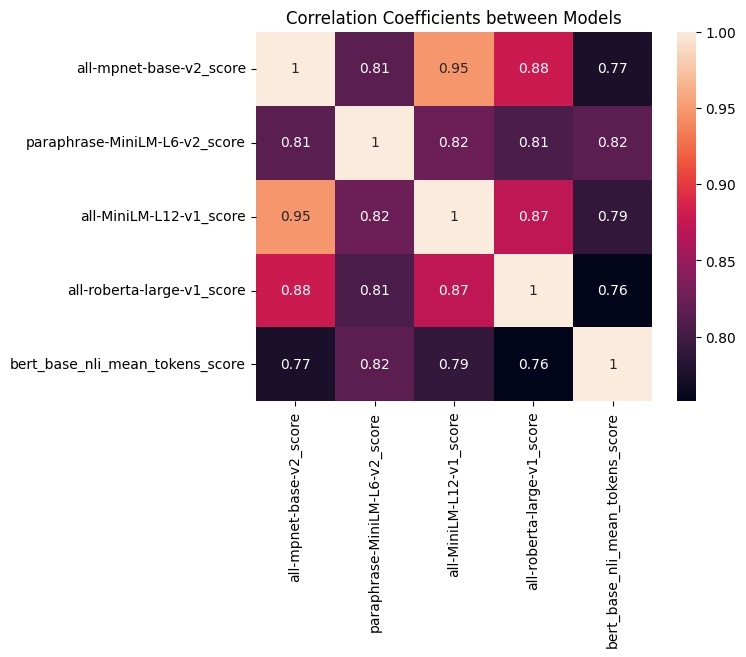

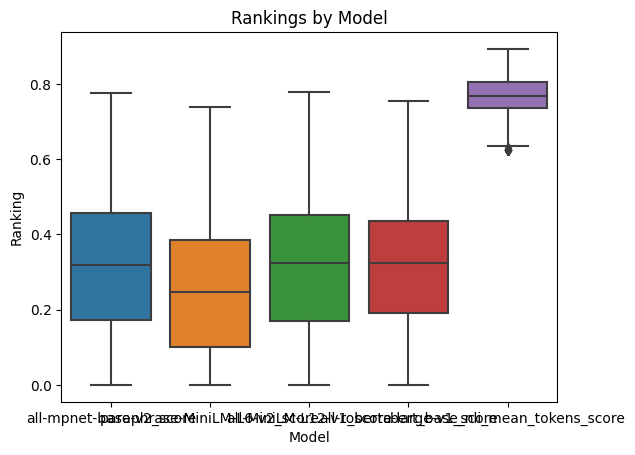

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called "ranking_dataframe" with the rankings for each model
columns = ['all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score', 'all-MiniLM-L12-v1_score', 'all-roberta-large-v1_score', 'bert_base_nli_mean_tokens_score']
model_rankings = matching_dataframe[columns]

# Calculate the correlation coefficients between the models
correlations = model_rankings.corr()
# Visualize the correlations as a heatmap
sns.heatmap(correlations, annot=True)
plt.title('Correlation Coefficients between Models')
plt.show()

# Create a boxplot of the rankings for each model
sns.boxplot(data=model_rankings)
plt.title('Rankings by Model')
plt.xlabel('Model')
plt.ylabel('Ranking')
plt.show()

# Assuming you have a DataFrame called "df"


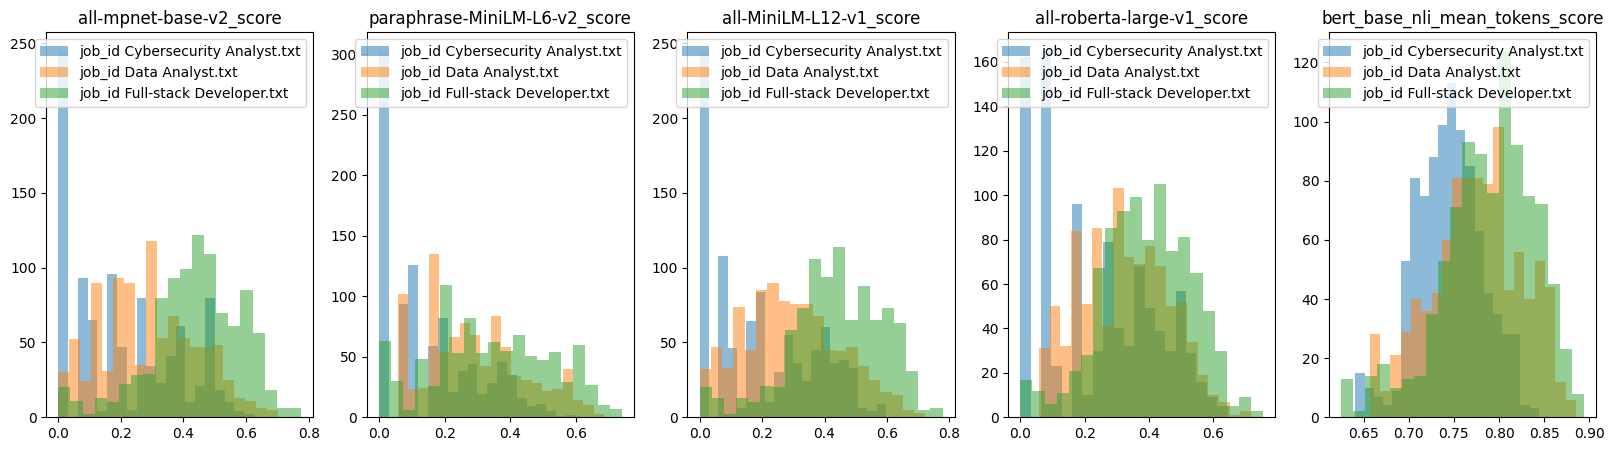

In [ ]:
import matplotlib.pyplot as plt

# select the columns of interest and group by job_id
scores = matching_dataframe[['job_id', 'all-mpnet-base-v2_score',
       'paraphrase-MiniLM-L6-v2_score', 'all-MiniLM-L12-v1_score',
       'all-roberta-large-v1_score', 'bert_base_nli_mean_tokens_score']]
scores_grouped = scores.groupby('job_id')

# plot histograms of the scores for each job_id
fig, axs = plt.subplots(nrows=1, ncols=len(scores.columns)-1, figsize=(20, 5))
for i, col in enumerate(scores.columns[1:]):
    for job_id, group in scores_grouped:
        axs[i].hist(group[col], bins=20, alpha=0.5, label=f'job_id {job_id}')
    axs[i].set_title(col)
    axs[i].legend()
plt.show()


In [ ]:
import numpy as np

In [ ]:
import numpy as np

# Get the columns to calculate thresholds for
columns = matching_dataframe.columns[-5:]

# Create a dictionary to store the thresholds
thresholds = {}

# Iterate over the columns
for column in columns:
    # Calculate the 80th percentile of the scores
    scores = matching_dataframe[column]
    threshold = np.quantile(scores, 0.8)

    # Store the threshold in the dictionary
    thresholds[column] = threshold


In [ ]:
thresholds

{'all-mpnet-base-v2_score': 0.479,
 'paraphrase-MiniLM-L6-v2_score': 0.418,
 'all-MiniLM-L12-v1_score': 0.479,
 'all-roberta-large-v1_score': 0.467,
 'bert_base_nli_mean_tokens_score': 0.814}

In [ ]:
print(df.columns)
print(final_df.columns)

Index(['filename', 'contact', 'degrees', 'education', 'skills',
       'min_degree_level'],
      dtype='object')
Index(['filename', 'job_id', 'degree_match'], dtype='object')


In [ ]:
models = matching_dataframe.columns[-5:]

# Create a list to store the DataFrames
dfs = []

# Merge the final_df and matching_dataframe DataFrames on filename/resume_id and job_id
merged_df = pd.merge(final_df, matching_dataframe.rename(columns={'resume_id': 'filename'}), on=['filename', 'job_id'])

# Iterate over the models
for model in models:
    # Create a new DataFrame for this model
    final_result = merged_df[['filename', 'job_id', 'degree_match', model]].copy()
    
    # Rename the model column to 'score'
    final_result = final_result.rename(columns={model: model})
    
    # Create a result column
    final_result['result'] = 0
    
    # Iterate over the rows of the DataFrame
    for index, row in final_result.iterrows():
        # Get the job title and score for this row
        job_title = row['job_id']
        score = row[model]
        
        # Get the threshold for this job title and model
        threshold = thresholds[model]
        
        # Set the result column to 1 if degree_match is True and the score passes the threshold level
        if score > threshold:
            final_result.at[index, 'result'] = 1
    
    # Store the DataFrame in the list
    dfs.append(final_result)


In [ ]:
# Iterate over the DataFrames in the dfs list
for i, df in enumerate(dfs):
    # Count the number of 1s in the result column
    num_ones = df['result'].sum()
    
    # Print the result
    print(f"DataFrame {i}: {num_ones} ones")

DataFrame 0: 561 ones
DataFrame 1: 563 ones
DataFrame 2: 563 ones
DataFrame 3: 557 ones
DataFrame 4: 557 ones


In [ ]:
dfs[4].columns

Index(['filename', 'job_id', 'degree_match', 'bert_base_nli_mean_tokens_score',
       'result'],
      dtype='object')

In [ ]:
dfs

[             filename                     job_id  degree_match  \
 0     pdf_resume_1001   Full-stack Developer.txt          True   
 1     pdf_resume_1001   Full-stack Developer.txt          True   
 2     pdf_resume_1001           Data Analyst.txt          True   
 3     pdf_resume_1001  Cybersecurity Analyst.txt          True   
 4     pdf_resume_1020   Full-stack Developer.txt          True   
 ...               ...                        ...           ...   
 2813   pdf_resume_997           Data Analyst.txt          True   
 2814   pdf_resume_997  Cybersecurity Analyst.txt          True   
 2815   pdf_resume_998   Full-stack Developer.txt          True   
 2816   pdf_resume_998           Data Analyst.txt          True   
 2817   pdf_resume_998  Cybersecurity Analyst.txt          True   
 
       all-mpnet-base-v2_score  result  
 0                       0.495       1  
 1                       0.495       1  
 2                       0.314       0  
 3                       0.358

In [ ]:
dfs[4].to_csv('bert_base.csv')

In [ ]:
labelled_dataset = pd.read_csv('labelled_dataset.csv')

In [ ]:
labelled_dataset['label'] = labelled_dataset['Similarity'].apply(lambda x: 1 if x >= 0.8 else 0)
labelled_dataset.head()

,Unnamed: 0,Similarity,Filename,resume_content,job_titles,job_posts,label
0,0,0.8348,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Back-end Developer,Job Description: A back-end developer is resp...,1
1,1,0.8532,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Cloud Engineer,Job Description: A cloud engineer is responsi...,1
2,2,0.8072,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Cybersecurity Analyst,Job Description: A cybersecurity analyst is r...,1
3,3,0.8197,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Data Analyst,Job Description: A data analyst is responsibl...,1
4,4,0.8115,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Database Administrator,Job Description: A database administrator is ...,1


In [ ]:
labelled_dataset.columns

Index(['Unnamed: 0', 'Similarity', 'Filename', 'resume_content', 'job_titles',
       'job_posts', 'label'],
      dtype='object')

In [ ]:
labelled_dataset

,Unnamed: 0,Similarity,Filename,resume_content,job_titles,job_posts,label
0,0,0.8348,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Back-end Developer,Job Description: A back-end developer is resp...,1
1,1,0.8532,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Cloud Engineer,Job Description: A cloud engineer is responsi...,1
2,2,0.8072,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Cybersecurity Analyst,Job Description: A cybersecurity analyst is r...,1
3,3,0.8197,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Data Analyst,Job Description: A data analyst is responsibl...,1
4,4,0.8115,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Database Administrator,Job Description: A database administrator is ...,1
...,...,...,...,...,...,...,...
21820,21820,0.7928,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Network Administrator,Job Description: A network administrator is r...,0
21821,21821,0.8387,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Software Engineer,Job Description: A software engineer is respo...,1
21822,21822,0.7921,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Systems Administrator,Job Description: A systems administrator is r...,0
21823,21823,0.8402,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Technical Writer,Job Description: A technical writer is respon...,1


In [ ]:
import pandas as pd

# Initialize scores dictionary
scores = {}
models = ['all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score','all-MiniLM-L12-v1_score','all-roberta-large-v1_score','bert_base_nli_mean_tokens_score']# Iterate over the models
for model, df in zip(models, dfs):
    # Merge the dataframes
    labelled_dataset['job_titles_with_txt'] = labelled_dataset['job_titles'].apply(lambda x: f"{x}.txt")

    # Merge the dataframes
    merged_df = pd.merge(df, labelled_dataset, left_on=['filename', 'job_id'], right_on=['Filename', 'job_titles_with_txt'])
    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    TP = sum((merged_df['label'] == 1) & (merged_df['result'] == 1))
    FP = sum((merged_df['label'] == 0) & (merged_df['result'] == 1))
    TN = sum((merged_df['label'] == 0) & (merged_df['result'] == 0))
    FN = sum((merged_df['label'] == 1) & (merged_df['result'] == 0))

    # Calculate accuracy and precision
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)

    # Store scores in the dictionary
    scores[model] = {'accuracy': accuracy, 'precision': precision}

# Print model-wise scores
for model, score in scores.items():
    print(f"{model}: Accuracy = {score['accuracy']:.2f}, Precision = {score['precision']:.2f}")


all-mpnet-base-v2_score: Accuracy = 0.59, Precision = 0.74
paraphrase-MiniLM-L6-v2_score: Accuracy = 0.61, Precision = 0.78
all-MiniLM-L12-v1_score: Accuracy = 0.60, Precision = 0.75
all-roberta-large-v1_score: Accuracy = 0.57, Precision = 0.67
bert_base_nli_mean_tokens_score: Accuracy = 0.62, Precision = 0.80


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score

# merge the labelled dataset with each of the dfs on matching filename and job titles
merged_dfs = []
labelled_dataset['job_titles_with_txt'] = labelled_dataset['job_titles'].apply(lambda x: f"{x}.txt")
for df, model in zip(dfs, models):
    
    merged_df = pd.merge(
        labelled_dataset, df,
        left_on=['Filename', 'job_titles_with_txt'],
        right_on=['filename', 'job_id'],
        how='inner'
    )
    merged_dfs.append((merged_df, model))

# calculate accuracy and precision scores for each job and each model
job_scores = {}
model_scores = {}
for merged_df, model in merged_dfs:
    for job_id, job_group in merged_df.groupby('job_id'):
        acc = accuracy_score(job_group['label'], job_group['result'])
        prec = precision_score(job_group['label'], job_group['result'])
        if job_id not in job_scores:
            job_scores[job_id] = {}
        if model not in model_scores:
            model_scores[model] = {}
        job_scores[job_id][model] = (acc, prec)
        model_scores[model][job_id] = (acc, prec)

# print job-wise scores
print('Job-wise  scores:')
for job_id, scores in job_scores.items():
    print(job_id)
    for model, (acc, prec) in scores.items():
        print(f'\t{model} accuracy: {acc:.3f}, precision: {prec:.3f}')

# print model-wise scores
print('Model-wise scores:')
for model, scores in model_scores.items():
    accs, precs = zip(*scores.values())
    avg_acc = sum(accs) / len(accs)
    avg_prec = sum(precs) / len(precs)
    print(f'{model} average accuracy: {avg_acc:.3f}, average precision: {avg_prec:.3f}')


Job-wise  scores:
Cybersecurity Analyst.txt
	all-mpnet-base-v2_score accuracy: 0.806, precision: 0.164
	paraphrase-MiniLM-L6-v2_score accuracy: 0.822, precision: 0.114
	all-MiniLM-L12-v1_score accuracy: 0.824, precision: 0.192
	all-roberta-large-v1_score accuracy: 0.774, precision: 0.194
	bert_base_nli_mean_tokens_score accuracy: 0.839, precision: 0.219
Data Analyst.txt
	all-mpnet-base-v2_score accuracy: 0.457, precision: 0.700
	paraphrase-MiniLM-L6-v2_score accuracy: 0.514, precision: 0.777
	all-MiniLM-L12-v1_score accuracy: 0.475, precision: 0.741
	all-roberta-large-v1_score accuracy: 0.480, precision: 0.733
	bert_base_nli_mean_tokens_score accuracy: 0.531, precision: 0.771
Full-stack Developer.txt
	all-mpnet-base-v2_score accuracy: 0.521, precision: 0.864
	paraphrase-MiniLM-L6-v2_score accuracy: 0.499, precision: 0.869
	all-MiniLM-L12-v1_score accuracy: 0.499, precision: 0.828
	all-roberta-large-v1_score accuracy: 0.445, precision: 0.853
	bert_base_nli_mean_tokens_score accuracy: 0.

In [ ]:
merged_df

,Unnamed: 0,Similarity,Filename,resume_content,job_titles,job_posts,label,job_titles_with_txt,filename,job_id,degree_match,bert_base_nli_mean_tokens_score,result
0,2,0.8072,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Cybersecurity Analyst,Job Description: A cybersecurity analyst is r...,1,Cybersecurity Analyst.txt,pdf_resume_1001,Cybersecurity Analyst.txt,True,0.728,0
1,3,0.8197,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Data Analyst,Job Description: A data analyst is responsibl...,1,Data Analyst.txt,pdf_resume_1001,Data Analyst.txt,True,0.750,0
2,7,0.8527,pdf_resume_1001,email: aparna.shrutijha@gmail.com mobile: 9630...,Full-stack Developer,Job Description: A full-stack developer is re...,1,Full-stack Developer.txt,pdf_resume_1001,Full-stack Developer.txt,True,0.782,0
3,62,0.7812,pdf_resume_1020,email: nathi.ananya20@gmail.com mobile: 917981...,Cybersecurity Analyst,Job Description: A cybersecurity analyst is r...,0,Cybersecurity Analyst.txt,pdf_resume_1020,Cybersecurity Analyst.txt,True,0.809,0
4,63,0.8147,pdf_resume_1020,email: nathi.ananya20@gmail.com mobile: 917981...,Data Analyst,Job Description: A data analyst is responsibl...,1,Data Analyst.txt,pdf_resume_1020,Data Analyst.txt,True,0.834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,21798,0.8085,pdf_resume_997,name: Vanshika Batra email: vanshikabatra281@g...,Data Analyst,Job Description: A data analyst is responsibl...,1,Data Analyst.txt,pdf_resume_997,Data Analyst.txt,True,0.799,0
2813,21802,0.8558,pdf_resume_997,name: Vanshika Batra email: vanshikabatra281@g...,Full-stack Developer,Job Description: A full-stack developer is re...,1,Full-stack Developer.txt,pdf_resume_997,Full-stack Developer.txt,True,0.822,1
2814,21812,0.7965,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Cybersecurity Analyst,Job Description: A cybersecurity analyst is r...,0,Cybersecurity Analyst.txt,pdf_resume_998,Cybersecurity Analyst.txt,True,0.754,0
2815,21813,0.8423,pdf_resume_998,email: 20b01a12i0@svecw.edu.in mobile: 9908774...,Data Analyst,Job Description: A data analyst is responsibl...,1,Data Analyst.txt,pdf_resume_998,Data Analyst.txt,True,0.847,1
